# *<span style='color:red'>Importing Libraries and Reading Data</span>*

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
img  = cv2.imread('./Ramos1.jpg')
img.shape

(612, 408, 3)

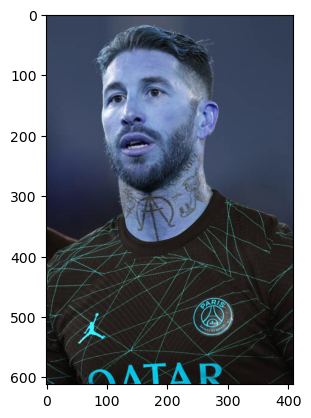

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(612, 408)

In [5]:
gray

array([[72, 72, 72, ..., 66, 66, 66],
       [72, 72, 72, ..., 66, 66, 66],
       [72, 72, 72, ..., 66, 66, 66],
       ...,
       [33, 20, 11, ..., 11, 13, 18],
       [31, 27, 22, ..., 12, 16, 23],
       [87, 91, 91, ..., 13, 19, 27]], shape=(612, 408), dtype=uint8)

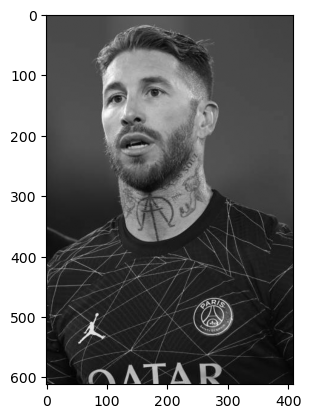

In [6]:
plt.imshow(gray, cmap='gray')

# *<span style='color:red'>Data Cleaning</span>*

In [7]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [8]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 44,  51, 207, 207]], dtype=int32)

In [9]:
x, y, w, h = faces[0]
x, y, w, h

(np.int32(44), np.int32(51), np.int32(207), np.int32(207))

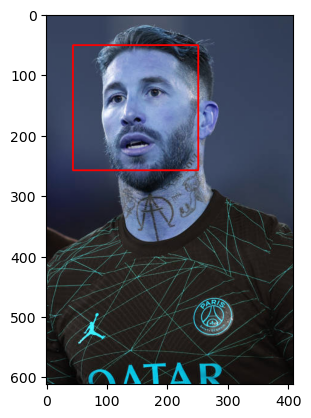

In [10]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

## *<span style='color:red'>Function to Detect Faces and Eyes</span>*

In [11]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey),(ex+ew, ey+eh),(0,255,0),2)

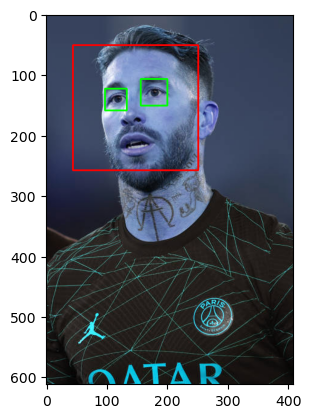

In [12]:
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

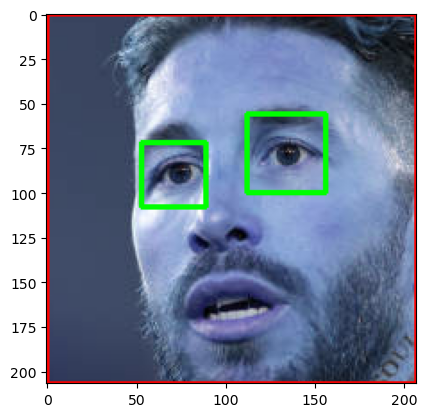

In [13]:
plt.imshow(roi_color, cmap='gray')

## *<span style='color:red'>Function to Crop Images to RegionOfInterest(roi)</span>*

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

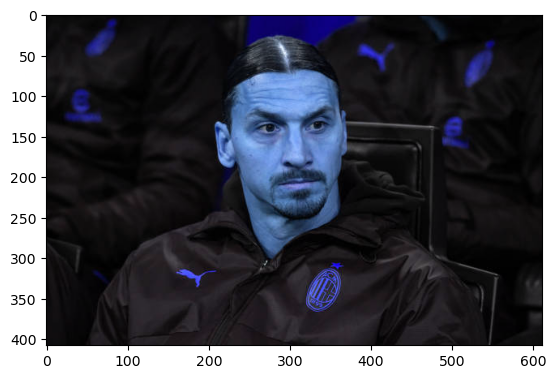

In [15]:
original_image = cv2.imread('./Zlatan1.jpg')
plt.imshow(original_image)

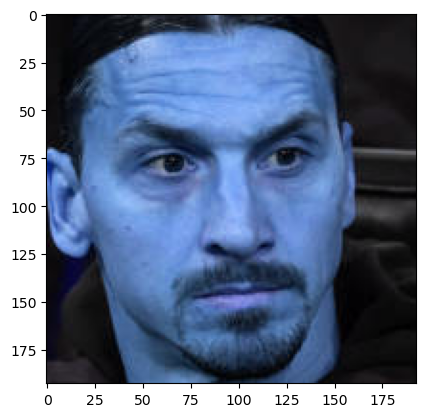

In [17]:
cropped_image = get_cropped_image_if_2_eyes("./Zlatan1.jpg")
plt.imshow(cropped_image)

## *<span style='color:red'>Path management</span>*

In [18]:
path_to_data = "./dataset"
path_to_cropped_data = "./dataset/cropped"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir() and entry.name != "cropped":
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./dataset\\cristiano_ronaldo',
 './dataset\\erling_haaland',
 './dataset\\jude_bellingham',
 './dataset\\kevin_de_bruyne',
 './dataset\\kylian_mbappe',
 './dataset\\lionel_messi',
 './dataset\\neymar_jr',
 './dataset\\robert_lewandowski',
 './dataset\\sergio_ramos',
 './dataset\\zlatan_ibrahimovic']

In [21]:
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

## *<span style='color:red'>Cropping Images</span>*

In [22]:
cropped_image_dirs = []
footballer_file_names_dict = {}

#### *We are going to create a dictionary of the following type*
```python
{
    'lionel_messi': [
        './dataset/cropped/lionel_messi/lionel_messi1.png'
        './dataset/cropped/lionel_messi/lionel_messi2.png'
        './dataset/cropped/lionel_messi/lionel_messi3.png'
    ],
    'cristiano_ronaldo': [
        './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo1.png'
        './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo2.png'
        './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo3.png'
    ]
}

In [23]:
for img_dir in img_dirs:
    count = 1
    footballer_name = os.path.basename(img_dir)
    print(footballer_name)

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cropped_data, footballer_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = footballer_name +str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            
            if footballer_name not in footballer_file_names_dict:
                footballer_file_names_dict[footballer_name] = []
            footballer_file_names_dict[footballer_name].append(cropped_file_path)
            count+=1

cristiano_ronaldo
Generating cropped images in folder:  ./dataset/cropped\cristiano_ronaldo
erling_haaland
Generating cropped images in folder:  ./dataset/cropped\erling_haaland
jude_bellingham
Generating cropped images in folder:  ./dataset/cropped\jude_bellingham
kevin_de_bruyne
Generating cropped images in folder:  ./dataset/cropped\kevin_de_bruyne
kylian_mbappe
Generating cropped images in folder:  ./dataset/cropped\kylian_mbappe
lionel_messi
Generating cropped images in folder:  ./dataset/cropped\lionel_messi
neymar_jr
Generating cropped images in folder:  ./dataset/cropped\neymar_jr
robert_lewandowski
Generating cropped images in folder:  ./dataset/cropped\robert_lewandowski
sergio_ramos
Generating cropped images in folder:  ./dataset/cropped\sergio_ramos
zlatan_ibrahimovic
Generating cropped images in folder:  ./dataset/cropped\zlatan_ibrahimovic


### *Rebuilding footballer_file_names_dict dictionary after manually deleting unwanted cropped images*

In [24]:
footballer_file_names_dict = {}
for img_dir in cropped_image_dirs:
    footballer_name = os.path.basename(img_dir)
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    footballer_file_names_dict[footballer_name] = file_list

In [25]:
footballer_file_names_dict

{'cristiano_ronaldo': ['./dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo1.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo10.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo11.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo12.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo13.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo14.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo15.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo16.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo17.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo18.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo19.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo2.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo20.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo21.png',
  './dataset/cropped\\cristiano_ronaldo\\cr

# *<span style='color:red'>Feature Engineering</span>*

## *Wavelet Transformation of Images*

In [26]:
import numpy as np
import pywt
import cv2

In [27]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #data type conversion
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255;
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    #process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H

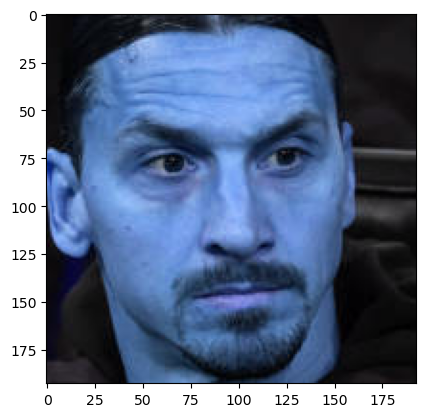

In [28]:
plt.imshow(cropped_image, cmap='gray')

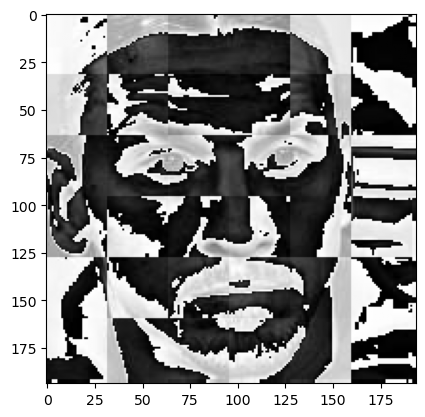

In [29]:
im_haar = w2d(cropped_image, 'db1', 5)
plt.imshow(im_haar, cmap='gray')

## *<span style=color:red>Input and Output processig</span>*

In [30]:
footballer_file_names_dict

{'cristiano_ronaldo': ['./dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo1.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo10.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo11.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo12.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo13.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo14.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo15.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo16.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo17.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo18.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo19.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo2.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo20.png',
  './dataset/cropped\\cristiano_ronaldo\\cristiano_ronaldo21.png',
  './dataset/cropped\\cristiano_ronaldo\\cr

In [31]:
X = []
y = []

### *Creating target values using dictionary*

In [32]:
target_dict = {}
count = 0
for footballer_name in footballer_file_names_dict.keys():
    target_dict[footballer_name] = count
    count += 1
target_dict

{'cristiano_ronaldo': 0,
 'erling_haaland': 1,
 'jude_bellingham': 2,
 'kevin_de_bruyne': 3,
 'kylian_mbappe': 4,
 'lionel_messi': 5,
 'neymar_jr': 6,
 'robert_lewandowski': 7,
 'sergio_ramos': 8,
 'zlatan_ibrahimovic': 9}

In [33]:
for footballer_name, training_file in footballer_file_names_dict.items():
    for training_image in training_file:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scaled_har_img = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_har_img.reshape(32*32, 1)))
        X.append(combined_img)
        y.append(target_dict[footballer_name])

In [34]:
len(X)

811

In [35]:
len(y)

811

In [36]:
len(X[0])

4096

In [37]:
32*32*3 + 32*32

4096

In [38]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(811, 4096)

In [39]:
X[0]

array([225., 230., 244., ..., 148.,   0.,   0.], shape=(4096,))

## *<span style = 'color:red'>Data cleaning process is done. Now we are ready to Train our model</span>*

#### *We will use different models to check the score*

In [40]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=88)

### <span style="color:red"> SVM</span>

In [42]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='linear', C=1, probability=True))])
svm_scores = cross_val_score(pipe, X, y, cv=5)
svm_scores.mean()

np.float64(0.8212906157691433)

### <span style="color:red">Logistic Regression</span>

In [43]:
pipe = Pipeline([('scaler', StandardScaler()), ('logistic_regression', LogisticRegression())])
lr_scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
lr_scores.mean()

np.float64(0.8323790047716428)

### <span style="color:red">Random Forest</span>

In [44]:
pipe = Pipeline([('scaler', StandardScaler()), ('random_forest', RandomForestClassifier())])
rf_scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
rf_scores.mean()

np.float64(0.6486707566462168)

### <span style="color:red">XGB Classifier</span>

In [45]:
pipe = Pipeline([('scaler', StandardScaler()), ('xgb_classifier', RandomForestClassifier())])
xgb_scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
xgb_scores.mean()

np.float64(0.6487010527910323)

#### *Here SVM and LogisticRegression gave a pretty good score*

#### *Let's apply GridSearchCV to find the best Model and Parameters*

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [47]:
model_params = {
    'svm':{
        'model': SVC(gamma='auto', probability=True),
        'params': {
            'svc__kernel': ['rbf','linear'],
            'svc__C': [0.1, 1, 10, 100],
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [0.1, 0.4, 1,5],
            'logisticregression__solver': ['liblinear', 'newton-cg'],
        }
    }
}

In [48]:
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False, n_jobs=-1)
    clf.fit(X_train, y_train)
    
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])

C:\Users\niloy\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [49]:
scores

,model,best_score,best_params
0,svm,0.807533,"{'svc__C': 0.1, 'svc__kernel': 'linear'}"
1,logistic_regression,0.845373,"{'logisticregression__C': 1, 'logisticregressi..."


In [50]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=0.1, gamma='auto', kernel='linear', probability=True))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='newton-cg'))])}

In [51]:
best_estimators['svm'].score(X_test, y_test)

0.8620689655172413

In [52]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8719211822660099

#### *<span style='color:red'>Here we get the best result for LogisticRegression</span>*

In [53]:
lr_model = best_estimators['logistic_regression']
svm_model = best_estimators['svm']

In [54]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, lr_model.predict(X_test))
cm2 = confusion_matrix(y_test, svm_model.predict(X_test))

In [55]:
cm1

array([[17,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1, 22,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 10,  0,  1,  1,  0,  1,  0],
       [ 0,  0,  0,  0, 16,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  0, 17,  0,  0,  1,  0],
       [ 0,  0,  2,  0,  1,  0, 18,  0,  2,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 13,  0,  0],
       [ 1,  0,  0,  1,  0,  4,  1,  0, 26,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  0,  0, 12]])

In [56]:
cm2

array([[17,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 23,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  8,  0,  2,  1,  1,  1,  0],
       [ 0,  0,  0,  0, 15,  0,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  1,  0],
       [ 1,  0,  3,  0,  0,  0, 18,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 13,  0,  0],
       [ 2,  0,  1,  1,  0,  2,  1,  0, 26,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  0,  0, 12]])

In [59]:
target_dict

{'cristiano_ronaldo': 0,
 'erling_haaland': 1,
 'jude_bellingham': 2,
 'kevin_de_bruyne': 3,
 'kylian_mbappe': 4,
 'lionel_messi': 5,
 'neymar_jr': 6,
 'robert_lewandowski': 7,
 'sergio_ramos': 8,
 'zlatan_ibrahimovic': 9}

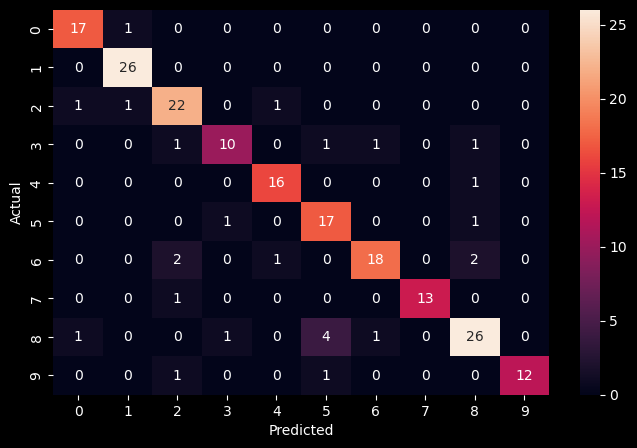

In [60]:
import seaborn as sn
plt.figure(figsize=(8,5))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.style.use('dark_background')
plt.show()

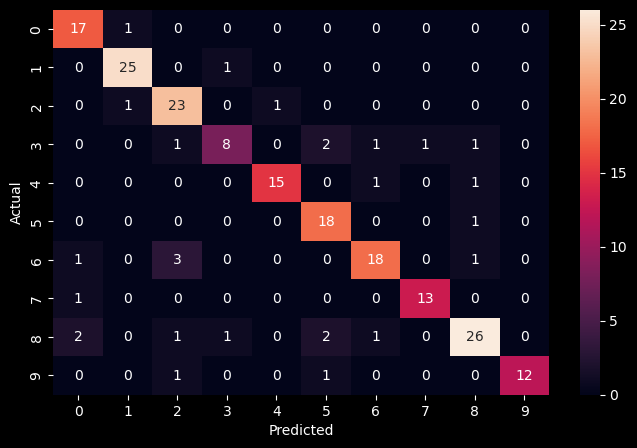

In [61]:
import seaborn as sn
plt.figure(figsize=(8,5))
sn.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.style.use('dark_background')
plt.show()

In [62]:
lr_preds = lr_model.predict(X_test)
svm_preds = svm_model.predict(X_test)

In [63]:
print("🔹 Logistic Regression Classification Report:\n")
print(classification_report(y_test, lr_preds))

🔹 Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.93      1.00      0.96        26
           2       0.81      0.88      0.85        25
           3       0.83      0.71      0.77        14
           4       0.89      0.94      0.91        17
           5       0.74      0.89      0.81        19
           6       0.90      0.78      0.84        23
           7       1.00      0.93      0.96        14
           8       0.84      0.79      0.81        33
           9       1.00      0.86      0.92        14

    accuracy                           0.87       203
   macro avg       0.88      0.87      0.88       203
weighted avg       0.88      0.87      0.87       203



In [64]:
print("🔹 SVM Classification Report:\n")
print(classification_report(y_test, svm_preds))

🔹 SVM Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.93      0.96      0.94        26
           2       0.79      0.92      0.85        25
           3       0.80      0.57      0.67        14
           4       0.94      0.88      0.91        17
           5       0.78      0.95      0.86        19
           6       0.86      0.78      0.82        23
           7       0.93      0.93      0.93        14
           8       0.87      0.79      0.83        33
           9       1.00      0.86      0.92        14

    accuracy                           0.86       203
   macro avg       0.87      0.86      0.86       203
weighted avg       0.87      0.86      0.86       203



# *<span style='color:red'>Saving the trained Model</span>*

In [65]:
import joblib
#saving the model as a pickle in a file
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [66]:
import joblib
#saving the model as a pickle in a file
joblib.dump(lr_model, 'lr_model.pkl')

['lr_model.pkl']

# *<span style='color:red'>Saving the target dictionary</span>*

In [67]:
import json
with open("target_dictionary.json","w") as f:
    f.write(json.dumps(target_dict))